# Forecasting - Airlines Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tsa_plots

from pandas import Grouper
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("C:/Users/BASHAR/OneDrive/Documents/Data Science/Assignment/Assignment - 18/Airlines+Data.csv")
data.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [4]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
data[data.duplicated()].shape

(0, 2)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


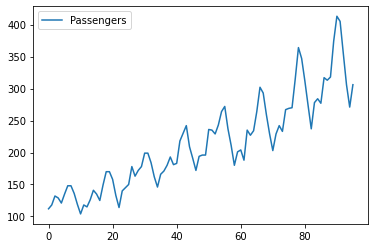

In [7]:
data.plot()
plt.show()

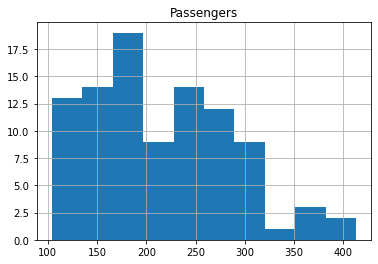

In [8]:
data.hist()
plt.show()

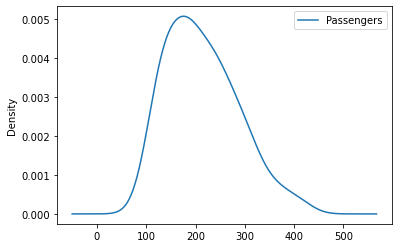

In [9]:
data.plot(kind="kde")
plt.show()

### Moving Average

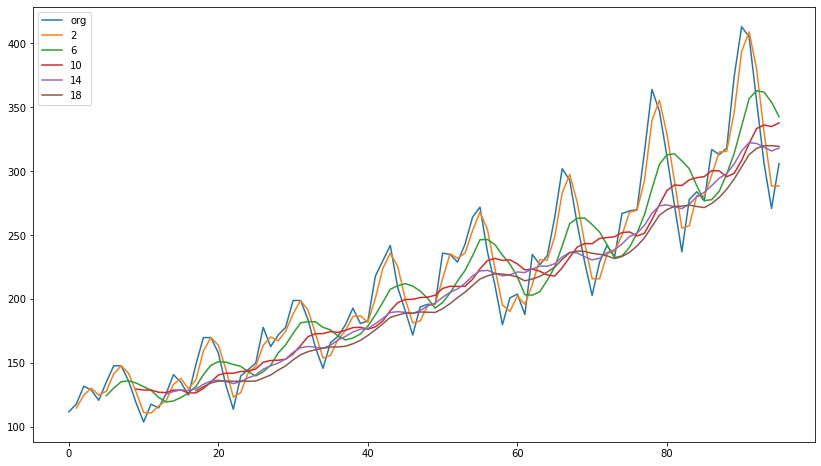

In [10]:
plt.figure(figsize=(14, 8))
data.Passengers.plot(label="org")
for i in range(2, 20, 4):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")

### Time series decomposition plot

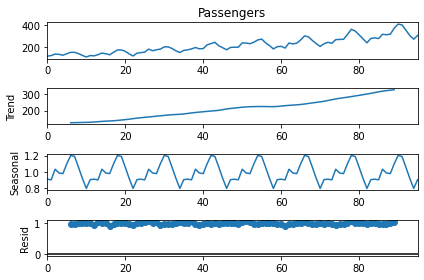

In [11]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=12, model="multiplicative")
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

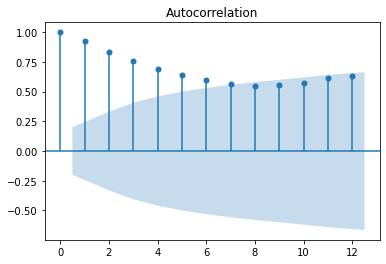

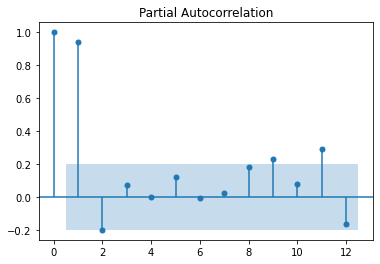

In [12]:
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

## Data Preprocessing

In [13]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
p = data["Month"][0]
p[0:3]
data['months'] = 0

In [14]:
for i in range(96):
    p = data["Month"][i]
    data['months'][i]= p[0:3]

C:\Users\BASHAR\AppData\Local\Temp/ipykernel_4520/2832826083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['months'][i]= p[0:3]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
month_dummies = pd.DataFrame(pd.get_dummies(data['months']))
data1 = pd.concat([data, month_dummies],axis = 1)
data1

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
data1["t"] = np.arange(1,97)
data1["t_squared"] = data1["t"]*data1["t"]
data1["log_Passengers"] = np.log(data1["Passengers"])

In [17]:
data1.columns

Index(['Month', 'Passengers', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared',
       'log_Passengers'],
      dtype='object')

In [18]:
data1.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [19]:
data1.tail()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119
95,Dec-02,306,Dec,0,0,1,0,0,0,0,0,0,0,0,0,96,9216,5.723585


In [20]:
data1["Date"] = pd.to_datetime(data1.Month, format="%b-%y")
data1.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers,Date
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,1995-01-01
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,1995-02-01
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,1995-03-01
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,1995-04-01
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,1995-05-01


In [21]:
data1["year"] = data1.Date.dt.strftime("%Y")
data1.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers,Date,year
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,1995-01-01,1995
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,1995-02-01,1995
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,1995-03-01,1995
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,1995-04-01,1995
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,1995-05-01,1995


<AxesSubplot:xlabel='months', ylabel='year'>

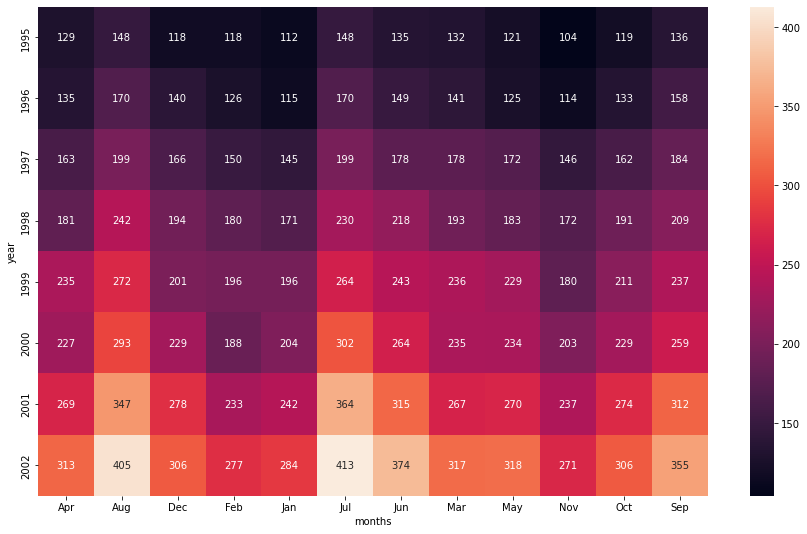

In [22]:
plt.figure(figsize=(15,9))
heatmap_Y_month = pd.pivot_table(data=data1, values="Passengers", index="year", columns="months", aggfunc="mean", fill_value=0)
sns.heatmap(heatmap_Y_month, annot=True, fmt="g")

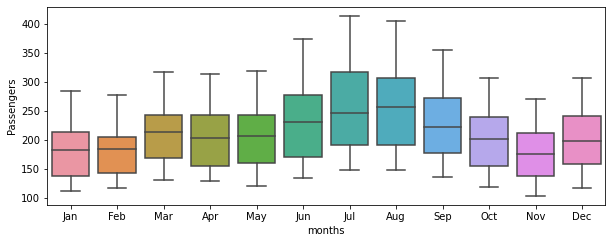

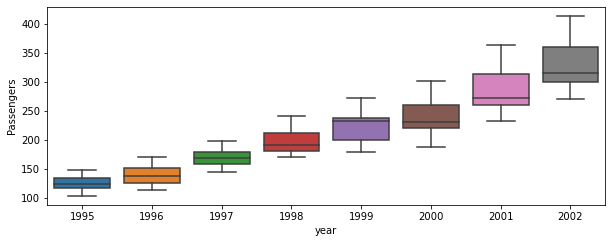

In [23]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x="months", y="Passengers", data = data1)
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(212)
sns.boxplot(x="year", y="Passengers", data = data1)
plt.show()

<AxesSubplot:xlabel='year', ylabel='Passengers'>

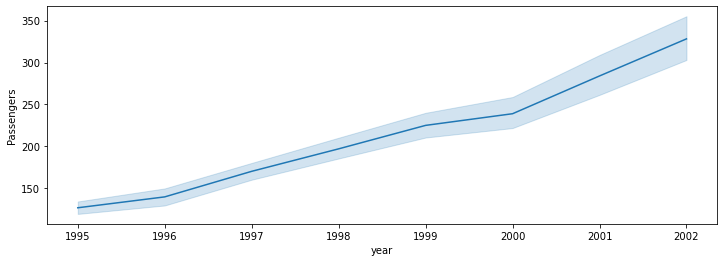

In [24]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year", y="Passengers", data=data1)

#### From all the above graphs we can say that the airline data has an upward trend with multiplicative seasonality.

## Splitting Data

In [25]:
Train = data1.head(84)
Test = data1.tail(12)

In [26]:
Train

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers,Date,year
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,1995-01-01,1995
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,1995-02-01,1995
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,1995-03-01,1995
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,1995-04-01,1995
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,1995-05-01,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Aug-01,347,Aug,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325,2001-08-01,2001
80,Sep-01,312,Sep,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003,2001-09-01,2001
81,Oct-01,274,Oct,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128,2001-10-01,2001
82,Nov-01,237,Nov,0,0,0,0,0,0,0,0,0,1,0,0,83,6889,5.468060,2001-11-01,2001


In [27]:
Test

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers,Date,year
84,Jan-02,284,Jan,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974,2002-01-01,2002
85,Feb-02,277,Feb,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018,2002-02-01,2002
86,Mar-02,317,Mar,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902,2002-03-01,2002
87,Apr-02,313,Apr,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203,2002-04-01,2002
88,May-02,318,May,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051,2002-05-01,2002
89,Jun-02,374,Jun,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256,2002-06-01,2002
90,Jul-02,413,Jul,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448,2002-07-01,2002
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,2002-08-01,2002
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,2002-09-01,2002
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,2002-10-01,2002


## Evaluation Metric RMSE & MAPE

In [28]:
def RMSE(pred, org):
    temp = np.mean((pred-org)**2)
    return np.sqrt(temp)

In [29]:
def MAPE(pred, org):
    temp = np.abs(((pred-org)/org)*100)
    return np.mean(temp)

## Building and Comparing Multiple Models to find out best model for Forecasting

## Linear model

In [30]:
model_linear = smf.ols("Passengers~t", data=Train).fit()
pred_linear = pd.Series(model_linear.predict(pd.DataFrame(Test["t"])))
pred_linear

84    288.419679
85    290.562607
86    292.705535
87    294.848463
88    296.991391
89    299.134319
90    301.277247
91    303.420175
92    305.563103
93    307.706031
94    309.848959
95    311.991887
dtype: float64

In [31]:
rmse_linear = RMSE(pred_linear, Test['Passengers'])
rmse_linear

53.199236534802665

In [32]:
mape_linear = MAPE(pred_linear, Test['Passengers'])
mape_linear

10.787458780263668

## Exponential model

In [33]:
model_expo = smf.ols("log_Passengers~t", data=Train).fit()
pred_expo = pd.Series(model_expo.predict(pd.DataFrame(Test["t"])))
pred_expo = np.exp(pred_expo)
pred_expo

84    302.668185
85    306.042469
86    309.454370
87    312.904309
88    316.392709
89    319.920000
90    323.486614
91    327.092991
92    330.739573
93    334.426809
94    338.155152
95    341.925060
dtype: float64

In [34]:
rmse_expo = RMSE(pred_expo, Test['Passengers'])
rmse_expo

46.05736110315608

In [35]:
mape_expo = MAPE(pred_expo, Test['Passengers'])
mape_expo

10.665738710883751

## Quadratic Model

In [36]:
model_quad = smf.ols("Passengers~t+t_squared", data=Train).fit()
pred_quad = pd.Series(model_quad.predict(pd.DataFrame(Test[["t","t_squared"]])))
pred_quad

84    296.926546
85    299.669959
86    302.427336
87    305.198678
88    307.983986
89    310.783257
90    313.596494
91    316.423695
92    319.264861
93    322.119992
94    324.989088
95    327.872148
dtype: float64

In [37]:
rmse_quad = RMSE(pred_quad, Test['Passengers'])
rmse_quad

48.051888979330954

In [38]:
mape_quad = MAPE(pred_quad, Test['Passengers'])
mape_quad

10.685102719319657

## Additive Seasonality

In [39]:
model_add_seas = smf.ols("Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep",data=Train).fit()
pred_add_seas = pd. Series(model_add_seas.predict(pd.DataFrame(Test[['Apr', 'Aug', 'Dec', 'Feb', 'Jan','Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']])))
pred_add_seas

84    169.285714
85    170.142857
86    197.428571
87    191.285714
88    190.571429
89    214.571429
90    239.571429
91    238.714286
92    213.571429
93    188.428571
94    165.142857
95    189.428571
dtype: float64

In [40]:
rmse_add_seas = RMSE(pred_add_seas, Test['Passengers'])
rmse_add_seas

132.8197848142182

In [41]:
mape_add_seas = MAPE(pred_add_seas, Test['Passengers'])
mape_add_seas

39.728616686874396

## Additive Seasonality with Quadratic trend

In [42]:
model_add_seas_quad = smf.ols("Passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep", data=Train).fit()
pred_add_seas_quad = pd.Series(model_add_seas_quad.predict(pd.DataFrame(Test[["t","t_squared",'Apr', 'Aug', 'Dec', 'Feb', 'Jan','Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']])))
pred_add_seas_quad

84    282.098895
85    283.691568
86    311.712813
87    306.305487
88    306.326732
89    331.062262
90    356.797793
91    356.676181
92    332.268854
93    307.861528
94    285.311344
95    310.332589
dtype: float64

In [43]:
rmse_add_seas_quad = RMSE(pred_add_seas_quad, Test['Passengers'])
rmse_add_seas_quad

26.360817612100416

In [44]:
mape_add_seas_quad = MAPE(pred_add_seas_quad, Test['Passengers'])
mape_add_seas_quad

5.1076452779225265

## Multiplicative Seasonality

In [45]:
model_mul_seas = smf.ols("log_Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep",data=Train).fit()
pred_mul_seas = pd. Series(model_mul_seas.predict(pd.DataFrame(Test[['Apr', 'Aug', 'Dec', 'Feb', 'Jan','Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']])))
pred_mul_seas = np.exp(pred_mul_seas)
pred_mul_seas

84    163.250497
85    165.816061
86    191.568046
87    184.843888
88    183.056135
89    206.057385
90    229.388674
91    229.474806
92    206.155387
93    181.480841
94    159.081429
95    182.749669
dtype: float64

In [46]:
rmse_mul_seas = RMSE(pred_mul_seas, Test['Passengers'])
rmse_mul_seas

140.06320204708635

In [47]:
mape_mul_seas = MAPE(pred_mul_seas, Test['Passengers'])
mape_mul_seas

41.875240929185225

## Multiplicative Additive Seasonality

In [48]:
model_mul_add_seas = smf.ols("log_Passengers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep",data=Train).fit()
pred_mul_add_seas = pd.Series(model_mul_add_seas.predict(pd.DataFrame(Test[["t", 'Apr', 'Aug', 'Dec', 'Feb', 'Jan','Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']])))
pred_mul_add_seas = np.exp(pred_mul_add_seas)
pred_mul_add_seas

84    279.259237
85    283.647937
86    327.699745
87    316.197279
88    313.139118
89    352.485470
90    392.396393
91    392.543731
92    352.653113
93    310.444392
94    272.127554
95    312.614872
dtype: float64

In [49]:
rmse_mul_add_seas = RMSE(pred_mul_add_seas, Test['Passengers'])
rmse_mul_add_seas

10.519172544323876

In [50]:
mape_mul_add_seas = MAPE(pred_mul_add_seas, Test['Passengers'])
mape_mul_add_seas

2.3752408474929156

## Building models using Exponential Smoothing 

In [51]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

## Simple Exponential Method

In [52]:
model_simple_expo = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_simple_expo = model_simple_expo.predict(start=Test.index[0], end=Test.index[-1])
pred_simple_expo

84    282.369838
85    282.369838
86    282.369838
87    282.369838
88    282.369838
89    282.369838
90    282.369838
91    282.369838
92    282.369838
93    282.369838
94    282.369838
95    282.369838
dtype: float64

In [53]:
rmse_simple_expo = RMSE(pred_simple_expo, Test['Passengers'])
rmse_simple_expo

64.84476396990442

In [54]:
mape_simple_expo = MAPE(pred_simple_expo, Test['Passengers'])
mape_simple_expo

13.41127474051367

## Holt method

In [55]:
model_holt = Holt(Train["Passengers"]).fit(smoothing_trend=0.2)
pred_holt = model_holt.predict(start=Test.index[0], end=Test.index[-1])
pred_holt

84    276.907540
85    275.815080
86    274.722620
87    273.630160
88    272.537701
89    271.445241
90    270.352781
91    269.260322
92    268.167862
93    267.075402
94    265.982943
95    264.890483
dtype: float64

In [56]:
rmse_holt = RMSE(pred_holt, Test['Passengers'])
rmse_holt

73.89010108103666

In [57]:
mape_holt = MAPE(pred_holt, Test['Passengers'])
mape_holt

15.9232239397902

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [58]:
model_holt_expo = ExponentialSmoothing(Train["Passengers"], seasonal="mul", trend="add", seasonal_periods=12).fit()
pred_holt_expo = model_holt_expo.predict(start=Test.index[0], end=Test.index[-1])
pred_holt_expo

84    281.192581
85    278.384988
86    322.560278
87    312.458557
88    311.025300
89    348.877115
90    389.548743
91    384.753427
92    341.860444
93    300.739077
94    262.170418
95    299.376171
dtype: float64

In [59]:
rmse_holt_expo = RMSE(pred_holt_expo, Test['Passengers'])
rmse_holt_expo

12.919179883239396

In [60]:
mape_holt_expo = MAPE(pred_holt_expo, Test['Passengers'])
mape_holt_expo

2.8205793420354914

## ARIMA model

In [61]:
from math import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

## Making Data Stationary

In [62]:
data2 = data1[["Date", "Passengers"]]
data2.to_csv("data3.csv", index=False)
series = read_csv("data3.csv", index_col=0)
series.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<AxesSubplot:xlabel='Date'>

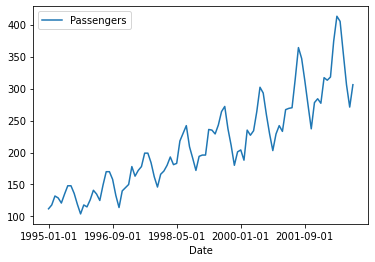

In [63]:
series.plot()

## Evaluation of Stationary Data

In [64]:
from statsmodels.tsa.stattools import adfuller

In [65]:
test_result=adfuller(series['Passengers'])

Ho: It is non stationary.
    
H1: It is stationary.

In [66]:
def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [67]:
adfuller_test(series['Passengers'])

ADF Test Statistic : 1.3402479596467118
p-value : 0.9968250481137263
#Lags Used : 12
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Log Transform

In [68]:
series['log_Passengers'] = np.log(series['Passengers'])
series.head()

,Passengers,log_Passengers
Date,,
1995-01-01,112,4.718499
1995-02-01,118,4.770685
1995-03-01,132,4.882802
1995-04-01,129,4.859812
1995-05-01,121,4.795791


In [69]:
adfuller_test(series['log_Passengers'])

ADF Test Statistic : -0.7230267542465397
p-value : 0.8406945968114745
#Lags Used : 12
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Square Root Transform

In [70]:
series['sqrt_Passengers'] = np.sqrt(series['Passengers'])
series.head()

,Passengers,log_Passengers,sqrt_Passengers
Date,,,
1995-01-01,112,4.718499,10.583005
1995-02-01,118,4.770685,10.862780
1995-03-01,132,4.882802,11.489125
1995-04-01,129,4.859812,11.357817
1995-05-01,121,4.795791,11.000000


In [71]:
adfuller_test(series['sqrt_Passengers'])

ADF Test Statistic : 0.45143464312623727
p-value : 0.9833197981745521
#Lags Used : 12
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Combination of SQRT and LOG Transform

In [72]:
from numpy import sqrt
from numpy import log

series['comb_Passengers'] = sqrt(log(series['Passengers']))
series.head()

,Passengers,log_Passengers,sqrt_Passengers,comb_Passengers
Date,,,,
1995-01-01,112,4.718499,10.583005,2.172211
1995-02-01,118,4.770685,10.862780,2.184190
1995-03-01,132,4.882802,11.489125,2.209706
1995-04-01,129,4.859812,11.357817,2.204498
1995-05-01,121,4.795791,11.000000,2.189929


In [73]:
adfuller_test(series['comb_Passengers'])

ADF Test Statistic : -0.9550105347323866
p-value : 0.7693176662249073
#Lags Used : 12
Number of Observations Used : 83
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [74]:
series['Seasonal_Difference']=series['Passengers']-series['Passengers'].shift(12)
series.head(14)

,Passengers,log_Passengers,sqrt_Passengers,comb_Passengers,Seasonal_Difference
Date,,,,,
1995-01-01,112,4.718499,10.583005,2.172211,NaN
1995-02-01,118,4.770685,10.862780,2.184190,NaN
1995-03-01,132,4.882802,11.489125,2.209706,NaN
1995-04-01,129,4.859812,11.357817,2.204498,NaN
1995-05-01,121,4.795791,11.000000,2.189929,NaN
1995-06-01,135,4.905275,11.618950,2.214785,NaN
1995-07-01,148,4.997212,12.165525,2.235445,NaN
1995-08-01,148,4.997212,12.165525,2.235445,NaN
1995-09-01,136,4.912655,11.661904,2.216451,NaN


In [75]:
adfuller_test(series['Seasonal_Difference'].dropna())

ADF Test Statistic : -2.6900043838623167
p-value : 0.07578397625851754
#Lags Used : 1
Number of Observations Used : 82
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Combination of SQRT Transform with Differencing

In [76]:
series['sqrt_Passengers_Difference']=series['sqrt_Passengers']-series['sqrt_Passengers'].shift(12)
series.head(14)

,Passengers,log_Passengers,sqrt_Passengers,comb_Passengers,Seasonal_Difference,sqrt_Passengers_Difference
Date,,,,,,
1995-01-01,112,4.718499,10.583005,2.172211,NaN,NaN
1995-02-01,118,4.770685,10.862780,2.184190,NaN,NaN
1995-03-01,132,4.882802,11.489125,2.209706,NaN,NaN
1995-04-01,129,4.859812,11.357817,2.204498,NaN,NaN
1995-05-01,121,4.795791,11.000000,2.189929,NaN,NaN
1995-06-01,135,4.905275,11.618950,2.214785,NaN,NaN
1995-07-01,148,4.997212,12.165525,2.235445,NaN,NaN
1995-08-01,148,4.997212,12.165525,2.235445,NaN,NaN
1995-09-01,136,4.912655,11.661904,2.216451,NaN,NaN


In [77]:
adfuller_test(series['sqrt_Passengers_Difference'].dropna())

ADF Test Statistic : -2.918327873445584
p-value : 0.043257850163867094
#Lags Used : 1
Number of Observations Used : 82
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


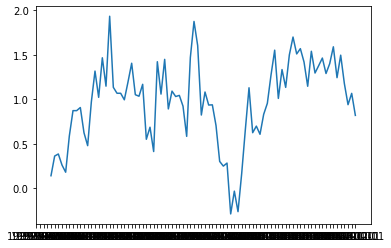

In [78]:
plt.plot(series['sqrt_Passengers_Difference'])
plt.show()

## Splitting Data

In [87]:
series1 = read_csv("data3.csv", index_col=0)
split_point = len(series1)-12
dataset, validation = series1[0:split_point], series1[split_point:]
print("dataset %d, validation %d" % (len(dataset), len(validation)))

dataset 84, validation 12


In [88]:
dataset.to_csv("dataset.csv", header=False)
validation.to_csv("validation.csv", header=False)

## Persistence/ Base model

In [91]:
train = read_csv("dataset.csv", header=None, index_col=0, parse_dates=True, squeeze=True)

X = train.values
X = X.astype("float32")
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [92]:
history = [X for X in train]
predictions = list()

for i in range (len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    obs = test[i]
    history.append(obs) 
    print(">Predicted=%.3f, Expected=%.3f" % (yhat, obs))
        
rmse = sqrt(mean_squared_error(test, predictions))
print("RMSE: %.3f" % rmse)

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

## ARIMA Hyperparameters

In [95]:
def evaluate_arima_model(X, arima_order):
    X = X.astype("float32")
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    
    history = [X for X in train]
    predictions = list()
    
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

## Grid search for p,d,q values

In [96]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype("float32")
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print("ARIMA%S RMSE=%.3f" % (order, rmse))
                except:
                    continue
    print("Best ARIMA%s RMSE=%.3f" % (best_cfg, best_score))

In [105]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)


evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMA(0, 1, 4) RMSE=0.094


## Build Model based on the optimized values

In [97]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
df = train.values
df = df.astype("float32")
test = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

In [98]:
model_arima = ARIMA(df, order=(0, 1, 4)).fit()
forecast = model_arima.forecast(steps=12)[0]
forecast

array([297.28412169, 300.64551701, 305.17512271, 296.15034173,
       298.32006564, 300.48978956, 302.65951347, 304.82923738,
       306.9989613 , 309.16868521, 311.33840912, 313.50813304])

In [99]:
rmse_arima = RMSE(forecast, test[1])
rmse_arima

27.412062124651097

In [100]:
mape_arima = MAPE(forecast, test[1])
mape_arima

9.704208720390856

## Conclusion

In [101]:
output = pd.DataFrame({"Models": pd.Series(["model_linear", "model_expo", "model_quad", "model_add_seas", "model_add_seas_quad", "model_mul_seas", "model_mul_add_seas", "model_simple_expo", "model_holt", "model_holt_expo", "model_arima"]),
                      "RMSE_values": pd.Series([rmse_linear, rmse_expo, rmse_quad, rmse_add_seas, rmse_add_seas_quad, rmse_mul_seas, rmse_mul_add_seas, rmse_simple_expo, rmse_holt, rmse_holt_expo, rmse_arima]),
                      "MAPE_values": pd.Series([mape_linear, mape_expo, mape_quad, mape_add_seas, mape_add_seas_quad, mape_mul_seas, mape_mul_add_seas, mape_simple_expo, mape_holt, mape_holt_expo, mape_arima])})

In [102]:
output.sort_values(["RMSE_values"])

,Models,RMSE_values,MAPE_values
6,model_mul_add_seas,10.519173,2.375241
9,model_holt_expo,12.919180,2.820579
4,model_add_seas_quad,26.360818,5.107645
10,model_arima,27.412062,9.704209
1,model_expo,46.057361,10.665739
2,model_quad,48.051889,10.685103
0,model_linear,53.199237,10.787459
7,model_simple_expo,64.844764,13.411275
8,model_holt,73.890101,15.923224
3,model_add_seas,132.819785,39.728617


## Observation:

Model no 6 - 'model_mul_add_seas' built with 'Multiplicative Additive Seasonality' method gives the best RMSE and MAPE values, hence this is the best model for Forecasting of Airlines Passengers data set.